<a href="https://colab.research.google.com/github/VaibhaVSharmaVvs/Car-Price-Prediction/blob/main/CarPrice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries we will use for our car price prediction model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/Car_extended.csv")

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
data.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [ ]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
data[data["mileage"].isnull() | data["engine"].isnull() | data["seats"].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['max_power'] = data['max_power'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )
data['engine'] = data['engine'].apply(lambda x: x.replace("CC","") if type(x)==str else np.nan)
data['mileage'] = data['mileage'].apply(lambda x: float(x.split()[0]) if type(x)==str else np.nan)

In [ ]:
data.drop(["torque"],axis=1,inplace=True)
data.drop(["name"],axis=1,inplace=True)

In [ ]:
data["age"] = 2021-data["year"]
data.drop(["year"],axis=1,inplace=True)

In [ ]:
data.shape

(7906, 11)

In [ ]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,5.0,14


In [ ]:
data.describe()

,selling_price,km_driven,mileage,seats,age
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,19.419861,5.416393,7.016064
std,8.135827e+05,5.679230e+04,4.036263,0.959208,3.863695
min,2.999900e+04,1.000000e+00,0.000000,2.000000,1.000000
25%,2.700000e+05,3.500000e+04,16.780000,5.000000,4.000000
50%,4.500000e+05,6.000000e+04,19.300000,5.000000,6.000000
75%,6.900000e+05,9.542500e+04,22.320000,5.000000,9.000000
max,1.000000e+07,2.360457e+06,42.000000,14.000000,27.000000


In [ ]:
Owners = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
data['owner'] = data['owner'].map(Owners)

In [ ]:
data.tail()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
8123,320000,110000,Petrol,Individual,Manual,1.0,18.50,1197,82.85,5.0,8
8124,135000,119000,Diesel,Individual,Manual,4.0,16.80,1493,110,5.0,14
8125,382000,120000,Diesel,Individual,Manual,1.0,19.30,1248,73.9,5.0,12
8126,290000,25000,Diesel,Individual,Manual,1.0,23.57,1396,70,5.0,8
8127,290000,25000,Diesel,Individual,Manual,1.0,23.57,1396,70,5.0,8


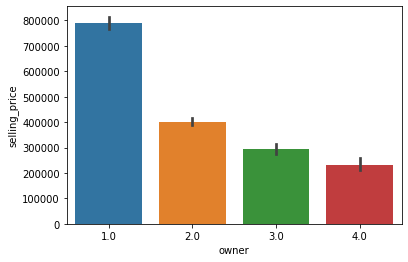

In [ ]:
sns.barplot(x='owner',y='selling_price',data=data)

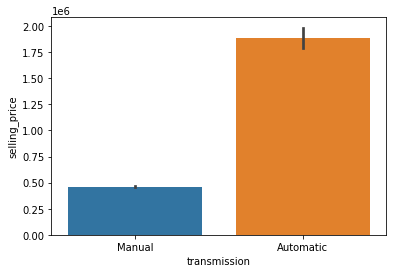

In [ ]:
sns.barplot(x='transmission',y='selling_price',data=data)

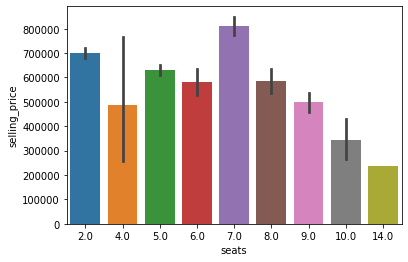

In [ ]:
sns.barplot(x='seats',y='selling_price',data=data)

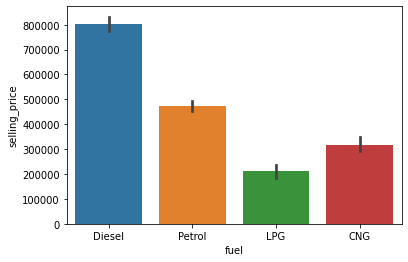

In [ ]:
sns.barplot(x='fuel',y='selling_price',data=data)

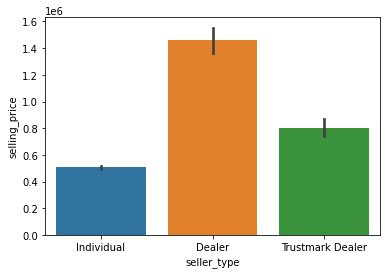

In [ ]:
sns.barplot(x='seller_type',y='selling_price',data=data)

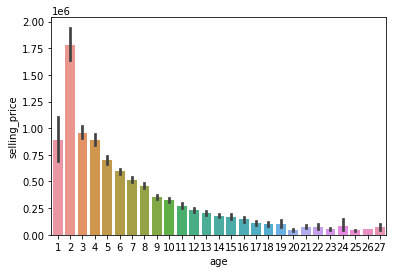

In [ ]:
sns.barplot(x='age',y='selling_price',data=data)

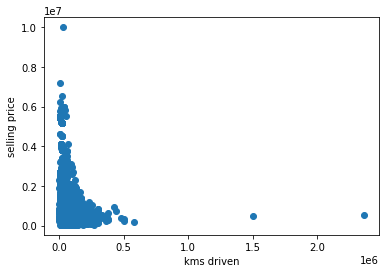

In [ ]:
plt.scatter(data['km_driven'], data['selling_price'])
plt.xlabel("kms driven")
plt.ylabel("selling price")   
plt.show()

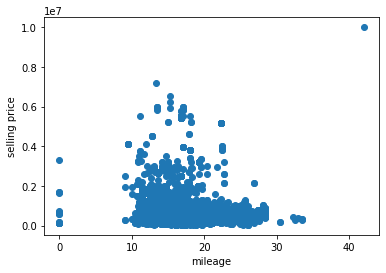

In [ ]:
plt.scatter(data['mileage'], data['selling_price'])
plt.xlabel("mileage")
plt.ylabel("selling price")   
plt.show()

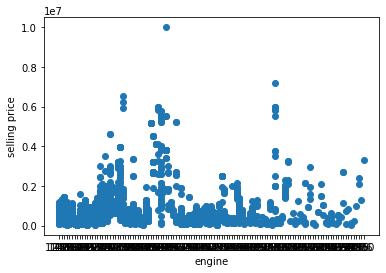

In [ ]:
plt.scatter(data['engine'], data['selling_price'])
plt.xlabel("engine")
plt.ylabel("selling price")   
plt.show()

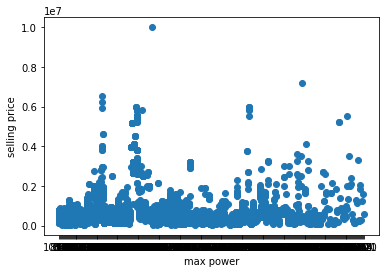

In [ ]:
plt.scatter(data['max_power'], data['selling_price'])
plt.xlabel("max power")
plt.ylabel("selling price")   
plt.show()

In [ ]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248,74,5.0,7
1,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498,103.52,5.0,7
2,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497,78,5.0,15
3,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396,90,5.0,11
4,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298,88.2,5.0,14


In [ ]:
categorical_cols = ['fuel', 'seller_type', 'transmission'] 

data = pd.get_dummies(data, columns = categorical_cols)

In [ ]:
data.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,450000,145500,1.0,23.40,1248,74,5.0,7,0,1,0,0,0,1,0,0,1
1,370000,120000,2.0,21.14,1498,103.52,5.0,7,0,1,0,0,0,1,0,0,1
2,158000,140000,3.0,17.70,1497,78,5.0,15,0,0,0,1,0,1,0,0,1
3,225000,127000,1.0,23.00,1396,90,5.0,11,0,1,0,0,0,1,0,0,1
4,130000,120000,1.0,16.10,1298,88.2,5.0,14,0,0,0,1,0,1,0,0,1


In [ ]:
data.isnull().any()

selling_price                   False
km_driven                       False
owner                            True
mileage                         False
engine                          False
max_power                       False
seats                           False
age                             False
fuel_CNG                        False
fuel_Diesel                     False
fuel_LPG                        False
fuel_Petrol                     False
seller_type_Dealer              False
seller_type_Individual          False
seller_type_Trustmark Dealer    False
transmission_Automatic          False
transmission_Manual             False
dtype: bool

In [ ]:
data.dropna(subset = ["owner"], inplace=True)

In [ ]:
data.isnull().any()

selling_price                   False
km_driven                       False
owner                           False
mileage                         False
engine                          False
max_power                       False
seats                           False
age                             False
fuel_CNG                        False
fuel_Diesel                     False
fuel_LPG                        False
fuel_Petrol                     False
seller_type_Dealer              False
seller_type_Individual          False
seller_type_Trustmark Dealer    False
transmission_Automatic          False
transmission_Manual             False
dtype: bool

In [ ]:
data.shape

(7901, 17)

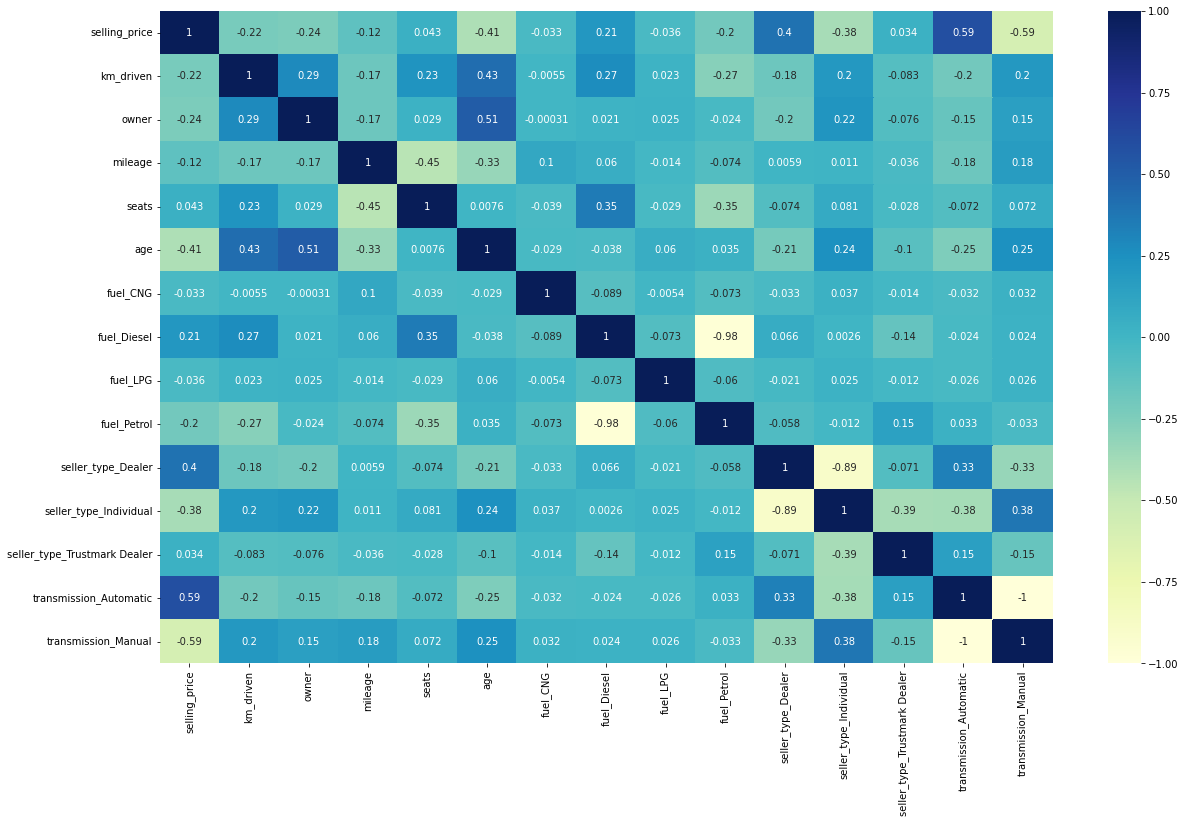

In [ ]:
correlations = data.corr()

indx=correlations.index
plt.figure(figsize=(20,12))
sns.heatmap(data[indx].corr(),annot=True,cmap="YlGnBu")

In [ ]:
Y=data[['selling_price']]
Y.head()

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [ ]:
X=data.drop(['selling_price'], axis=1)
X.head()

,km_driven,owner,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,145500,1.0,23.40,1248,74,5.0,7,0,1,0,0,0,1,0,0,1
1,120000,2.0,21.14,1498,103.52,5.0,7,0,1,0,0,0,1,0,0,1
2,140000,3.0,17.70,1497,78,5.0,15,0,0,0,1,0,1,0,0,1
3,127000,1.0,23.00,1396,90,5.0,11,0,1,0,0,0,1,0,0,1
4,120000,1.0,16.10,1298,88.2,5.0,14,0,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Y_train)
Y_train = scaler.transform(Y_train)
Y_test = scaler.transform(Y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, Y_train)
y_pred=linearRegression.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
def rmse(ytrue, ypredicted):
    return np.sqrt(mse(ytrue, ypredicted))

In [ ]:
rmse(Y_test, y_pred)

0.04413060316761937

In [ ]:
mae(Y_test,y_pred)

0.026821183540274317

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
r2_score = regressor.score(X_test,Y_test)
print(r2_score*100,'%')

67.6679258326485 %


In [ ]:
from xgboost import XGBRegressor
xgbr_2 = XGBRegressor(verbosity=0)
xgbr_2.fit(X_train, Y_train)
y_pred_X_2 = xgbr_2.predict(X_test)

In [ ]:
mae(Y_test,y_pred_X_2)

0.009213415642567826

In [ ]:
rmse(Y_test, y_pred_X_2)

0.015749263044614385

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y_test, y_pred_X_2)*100)

95.88211406047122
